In [84]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

from ml_methods.regression.regression import MyLinearRegression, MyPolynomialRegression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [85]:
california_housing = datasets.fetch_california_housing()
X = california_housing.data#[:, np.newaxis, 2]
y = california_housing.target

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
my_lin = MyLinearRegression(lr=0.1, n_iters=3000)
my_lin.fit(X_train, y_train)
my_lin_pred = my_lin.predict(X_test)

In [89]:
my_poly = MyPolynomialRegression(degree=2, lr=0.1, n_iters=5000)
my_poly.fit(X_train, y_train)
my_poly_pred = my_poly.predict(X_test)

In [90]:
sk_lin = LinearRegression()
sk_lin.fit(X_train, y_train)
sk_lin_pred = sk_lin.predict(X_test)

In [91]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_sk = poly_features.fit_transform(X_train)
X_test_poly_sk = poly_features.transform(X_test)

In [92]:
sk_poly = LinearRegression()
sk_poly.fit(X_train_poly_sk, y_train)
sk_poly_pred = sk_poly.predict(X_test_poly_sk)

In [93]:
print(f"MSE My Linear:        {mean_squared_error(y_test, my_lin_pred):.4f}")
print(f"MSE Sklearn Linear:   {mean_squared_error(y_test, sk_lin_pred):.4f}")
print("-" * 30)
print(f"MSE My Polynomial:    {mean_squared_error(y_test, my_poly_pred):.4f}")
print(f"MSE Sklearn Poly:     {mean_squared_error(y_test, sk_poly_pred):.4f}")

MSE My Linear:        0.5559
MSE Sklearn Linear:   0.5559
------------------------------
MSE My Polynomial:    0.8416
MSE Sklearn Poly:     0.4643


In [94]:
X_range = np.linspace(X_test.min(), X_test.max()).reshape(-1, 1)

In [95]:
my_lin_range_pred = my_lin.predict(X_range)
my_poly_range_pred = my_poly.predict(X_range)
sk_lin_pred_range = sk_lin.predict(X_range)
sk_poly_range_pred = sk_poly.predict(poly_features.transform(X_range))

ValueError: shapes (50,1) and (8,) not aligned: 1 (dim 1) != 8 (dim 0)

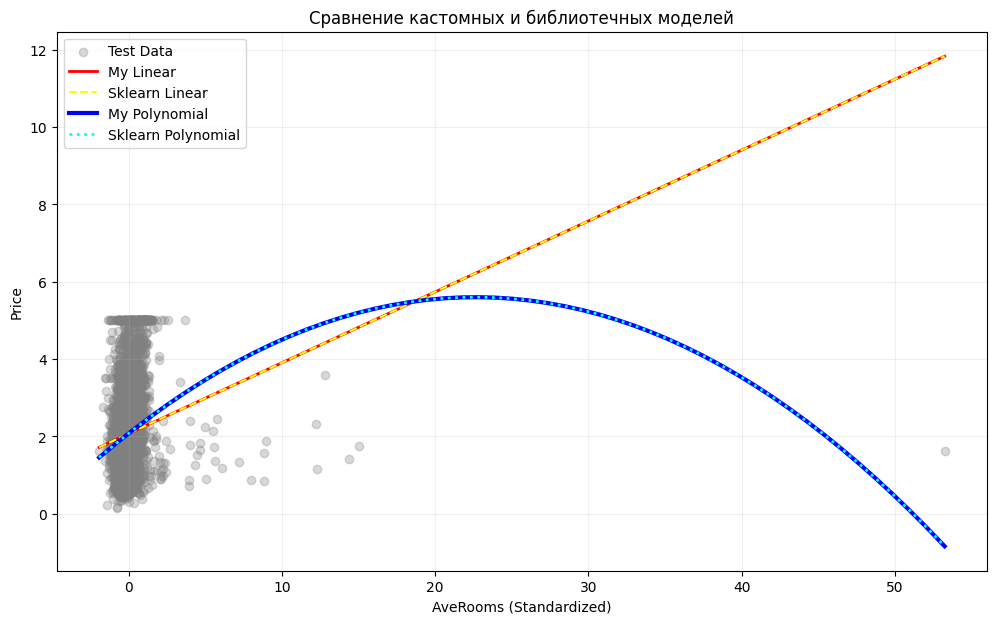

In [83]:
plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color='gray', alpha=0.3, label='Test Data')

# Рисуем линии
plt.plot(X_range, my_lin_range_pred, color='red', lw=2, label='My Linear')
plt.plot(X_range, sk_lin_pred_range, '--', color='yellow', label='Sklearn Linear')
plt.plot(X_range, my_poly_range_pred, color='blue', lw=3, label='My Polynomial')
plt.plot(X_range, sk_poly_range_pred, ':', color='cyan', lw=2, label='Sklearn Polynomial')

plt.title('Сравнение кастомных и библиотечных моделей')
plt.xlabel('AveRooms (Standardized)')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()